# 課題1：住宅価格のデータの前処理

ここではデータの前処理について理解いただくための課題を用意しました。

ここでは住宅価格のデータセットを利用します。今回の住宅価格のデータは、Colabのランタイムに標準でインストールされている「カリフォルニア州の住宅価格」ではなく、以下のページで配布されている「アイオワ州の住宅価格」のデータを利用します。

このデータは、Dean De Cockという統計学者の論文が出典元とされていて、以下のサイトでCSVファイルの配布と各列の説明がされています。

[Housing prices in Ames, Iowa](https://www.openintro.org/data/index.php?data=ames)

各セルに入っているコメントの下に、実行するコードを記入してください。また、作業内容の一部にPandasの公式ドキュメントへのリンクを追記していますので、わからない部分がありましたら参照してください。

**注意点：**

- 列名にドット（`.`）が入っているとPandasの処理中にエラーが発生するため、元データの列名から `.` を削除しています
- PID列のみ、元データから削除しています

## 1. 必要なライブラリの読み込み

In [1]:
# 必要なライブラリの読み込み（変更しないでください）
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. データの読み込み

CSVファイル *iowa_ames_housing_price.csv* を読み込み、内容を確認します。

In [2]:
# データを変数datasetに読み込む
# CSVファイルの読み込み
dataset = pd.read_csv("./iowa_ames_housing_price.csv")

In [3]:
# データの最初の5行を表示
dataset.head()

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


全データの行数と列数を取得します。DataFrameの`shape` プロパティを参照します。

参照：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

In [7]:
# データの行数、列数を表示
dataset.shape

(1460, 81)

## 3. 要約統計量を出力する

データ数、平均や中央値、標準偏差などの統計量を確認することで、データへの理解を深めます。

DataFrameの `describe()` を使うことで、様々な統計量の情報を要約として表示されます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [8]:
# 要約統計量を表示
dataset.describe()


,Order,area,price,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,1515.463699,180921.195890,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,525.480383,79442.502883,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,334.000000,34900.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,1129.500000,129975.000000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,1464.000000,163000.000000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,1776.750000,214000.000000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,5642.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## 4. 基本的なデータの操作

データの抽出・列の分割について学びます。

### インデックスを用いた行の指定

In [9]:
# インデックス番号0から10行分抽出
dataset.iloc[0:10, :]

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,1362,143000,50,RL,85.0,14115,Pave,NaN,IR1,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,1694,307000,20,RL,75.0,10084,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,2090,200000,60,RL,NaN,10382,Pave,NaN,IR1,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,1774,129900,50,RM,51.0,6120,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,1077,118000,190,RL,50.0,7420,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [11]:
# 最初の10行だけ抽出し、「price」と「LotArea」の列を表示
dataset.loc[0:9, ["price", "LotArea"]]

,price,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
5,143000,14115
6,307000,10084
7,200000,10382
8,129900,6120
9,118000,7420


### カラム間の演算

PandasのDataFrameでは、列同士の四則演算、ならびに新しい列の追加ができます。

たとえば、`df` というDataFrameの変数があり、中に `a`,`b` というカラムが存在するとき、`df['c'] = df['a'] + df['b']` と記述することで、`a`列と`b`列の加算結果を `c` という新しい列として `df` に追加してくれます。

In [10]:
# 「X1stFlrSF」と「X2ndFlrSF」を合計した「XFlrSF_total」を新たな列としてdatasetに加える
dataset["XFlrSF_total"] = dataset["X1stFlrSF"] + dataset["X2ndFlrSF"]

In [12]:
# datasetからloc関数を使用して「X1stFlrSF」と「X2ndFlrSF」、「XFlrSF_total」を先頭から5行分表示し、正しく追加されていることを確認する
dataset.loc[0:4, ["X1stFlrSF", "X2ndFlrSF", "XFlrSF_total"]]

,X1stFlrSF,X2ndFlrSF,XFlrSF_total
0,856,854,1710
1,1262,0,1262
2,920,866,1786
3,961,756,1717
4,1145,1053,2198


 ### ダミー変数の作成

列 `SaleType` は `WD`, `New`, `COD` などで構成されたカテゴリーデータです。 `get_dummies()` 関数を使用してダミー変数に変換しましょう。

参考：https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [13]:
# 列'SaleType'をダミー変数に展開したものを変数 dataset に上書きします
dataset = pd.get_dummies(dataset, columns=["SaleType"])

In [14]:
# ダミー変数が作成されていることを確認します　(datasetの最初の5行だけ出力)
dataset.head()

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,XFlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,1710,False,False,False,False,False,False,False,False,True
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,...,1262,False,False,False,False,False,False,False,False,True
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,1786,False,False,False,False,False,False,False,False,True
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,...,1717,False,False,False,False,False,False,False,False,True
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,2198,False,False,False,False,False,False,False,False,True


### フィルタリング

DataFrameの `query()` を使いフィルタリングを行ないましょう。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [16]:
# 'YearBuilt'が2000以降の物件のみを抽出し、最初の5件のみ表示
dataset.query("YearBuilt >= 2000").head()

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,XFlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,1710,False,False,False,False,False,False,False,False,True
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,1786,False,False,False,False,False,False,False,False,True
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,2198,False,False,False,False,False,False,False,False,True
6,7,1694,307000,20,RL,75.0,10084,Pave,NaN,Reg,...,1694,False,False,False,False,False,False,False,False,True
11,12,2324,345000,60,RL,85.0,11924,Pave,NaN,IR1,...,2324,False,False,False,False,False,False,True,False,False


`'LotArea >= 15000 and MSSubClass >= 50'` のように複数の条件を指定できます。

In [17]:
# 'YearBuilt'が2000以降、'GarageCars'が3以上の物件を抽出し、最初の5件のみ表示
dataset.query("YearBuilt >= 2000 & GarageCars >= 3").head()

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,XFlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,2198,False,False,False,False,False,False,False,False,True
11,12,2324,345000,60,RL,85.0,11924,Pave,NaN,IR1,...,2324,False,False,False,False,False,False,True,False,False
13,14,1494,279500,20,RL,91.0,10652,Pave,NaN,IR1,...,1494,False,False,False,False,False,False,True,False,False
20,21,2376,325300,60,RL,101.0,14215,Pave,NaN,IR1,...,2376,False,False,False,False,False,False,True,False,False
25,26,1600,256300,20,RL,110.0,14230,Pave,NaN,Reg,...,1600,False,False,False,False,False,False,False,False,True


## 5. データの可視化

データを理解するには要約統計量や抽出したデータを確認するだけでは不充分であり、可視化が必要です。

### ヒストグラム

連続変数の分布を確認する際に有効です。DataFrameの `hist()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

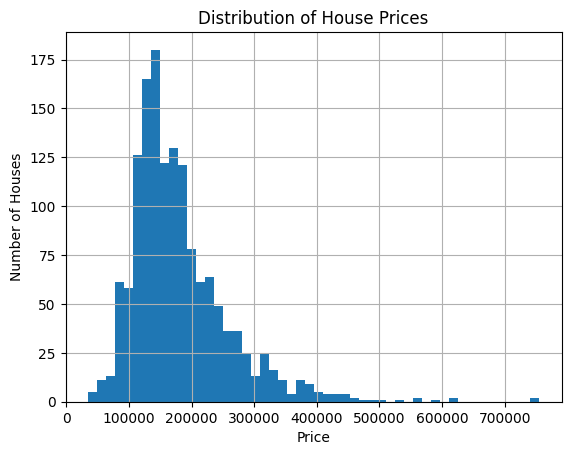

In [18]:
# datasetの'price'をヒストグラムで表示（DataFrameのhist()を利用する）
dataset["price"].hist(bins=50)
plt.xlabel("Price")
plt.ylabel("Number of Houses")
plt.title("Distribution of House Prices")
plt.show()

### 散布図

2つの変数の関係性を確認する際に有効です。DataFrameの `plot()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

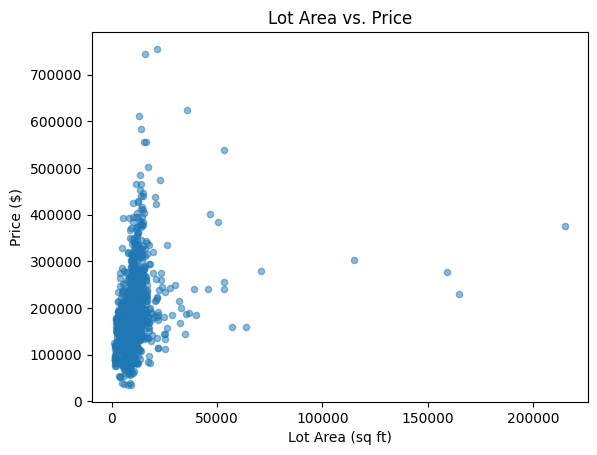

In [19]:
# datasetの'LotArea'と'price'を散布図で表示（DataFrameのplot()を利用する）
dataset.plot.scatter(x="LotArea", y="price", alpha=0.5)
plt.xlabel("Lot Area (sq ft)")
plt.ylabel("Price ($)")
plt.title("Lot Area vs. Price")
plt.show()

### 棒グラフ

大小や増減を比較する際に有効です。DataFrameの `plot.bar()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

In [20]:
#'price'のSaleConditionごとの平均を変数 price_by_condition に格納
price_by_condition = dataset.groupby("SaleCondition")["price"].mean()
print(price_by_condition)

SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    272291.752000
Name: price, dtype: float64


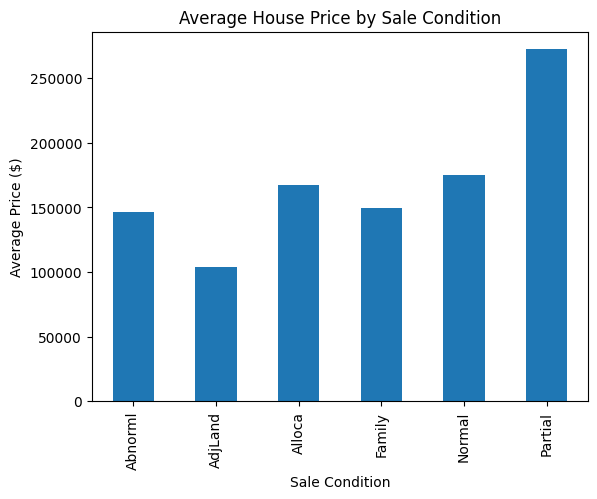

In [21]:
# price_by_conditionが持つ、棒グラフを表示する命令を実行
dataset.groupby("SaleCondition")["price"].mean().plot.bar()
plt.xlabel("Sale Condition")
plt.ylabel("Average Price ($)")
plt.title("Average House Price by Sale Condition")
plt.show()

### 箱ヒゲ図 (Boxplot)

複数の変数の分布を比較する際に有効です（棒グラフでは平均の比較はできますが、分布全体の比較はできません)。

DataFrameの `boxplot()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

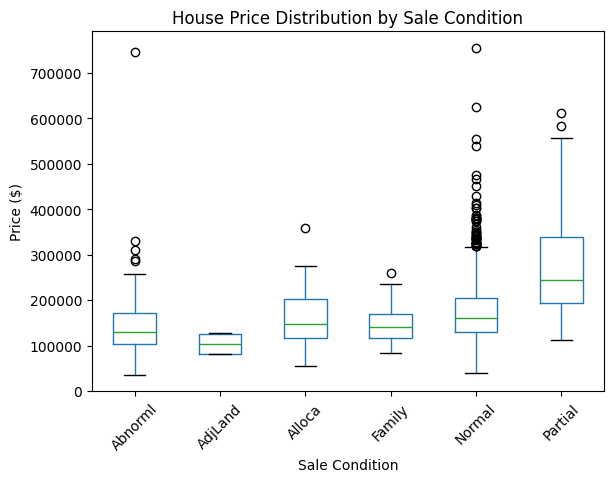

In [23]:
# datasetの'SaleCondition'ごとに'price'をDataFrameのboxplotで表示
dataset.boxplot(column="price", by="SaleCondition", grid=False, rot=45)
plt.xlabel("Sale Condition")
plt.ylabel("Price ($)")
plt.title("House Price Distribution by Sale Condition")
plt.suptitle("")
plt.show()

## 6. 欠損値の確認

ある列が欠損値を持っているかどうかは Pandas の `isnull()` でわかります。特定の列の欠損値を知りたい場合は `pd.isnull(dataset['LotFrontage'])` のように記述します。また、`.sum()` をつなげることで、その列で欠損値を持つ行数がわかります。

参考：https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

In [24]:
# すべての列がそれぞれ、欠損値が何行あるかを取得
dataset.isnull().sum()

Order             0
area              0
price             0
MSSubClass        0
MSZoning          0
                 ..
SaleType_ConLI    0
SaleType_ConLw    0
SaleType_New      0
SaleType_Oth      0
SaleType_WD       0
Length: 90, dtype: int64